In [3]:
import os
from shapely.geometry import Point, Polygon, MultiPolygon
from datetime import datetime
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import sqlite3 as sl
import json
import itertools
import matplotlib.pyplot as plt
import requests

import logging
logging.getLogger().setLevel(logging.INFO) # DEBUG, INFO or WARN

from dotenv import load_dotenv
load_dotenv()

from isochrones import Isochrones

DROOT = '../1-data/'
os.makedirs(os.path.join(DROOT, '3-interim', 'populationmasks'), exist_ok=True)

In [23]:
%%time
for x in range(10):
    print(x)
    url = "http://localhost:8989/isochrone"
    params = {
        "point": "52.38075, 4.90084",
        "profile": 'car',
        # "pt.earliest_departure_time": '2023-06-06T08:30:00Z',
        # "pt.arrive_by": 'false',
        # "locale": 'en-US',
        # "pt.profile": "false",
        # "pt.access_profile": 'foot',
        "time_limit": 600,
        "reverse_flow", "false"
    }

    response = requests.get(url, params=params)
    res = response.json()

0
1
2
3
4
5
6
7
8
9
CPU times: user 195 ms, sys: 15.1 ms, total: 210 ms
Wall time: 22.8 s


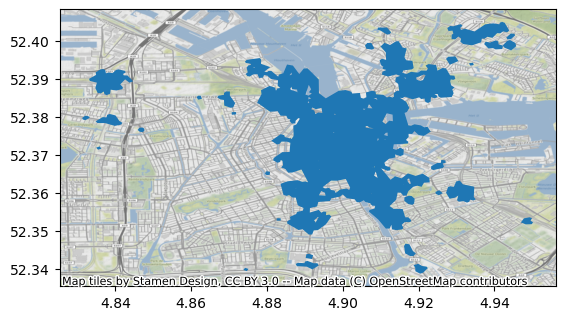

In [18]:

gdf = gpd.GeoDataFrame.from_features(res['polygons'], crs="EPSG:4326")
gdf['geometry'] = gdf.to_crs(gdf.estimate_utm_crs()).buffer(50).simplify(20).to_crs(gdf.crs)
ax = gdf.plot()
ctx.add_basemap(ax, crs=gdf.crs)

In [25]:
cities = pd.read_excel(os.path.join(DROOT, '1-research', 'cities.xlsx'), index_col=0)
cities.head(5)

City            ctr_name   ctr_lat   ctr_lon  cells Country  ID_HDC_G0
0    Vienna        Rathaus Wien  48.21080  16.35784   4381     AUT       3027
1      Graz     Hauptplatz Graz  47.06955  15.43383   1168     AUT       3000
2  Brussels  Brussels Town hall  50.84642   4.35232   3747     BEL       2135
3    Berlin       Old City Hall  52.51687  13.41160   5187     DEU       2851
4   Hamburg             Rathaus  53.55035   9.99232   4912     DEU       2531

In [1]:
for i, city in cities.iterrows():
    break;
    print(city.City)
    file = f'{city.ID_HDC_G0}.pcl'
    df = pd.read_pickle(os.path.join(DROOT, '3-interim', 'populationmasks', file))
    gdf = gpd.GeoDataFrame(df)
    
    origins  = enumerate(gdf.centroid.to_crs("EPSG:4326"))
    times    = [5, 15, 25, 35, 45]
    modes_dt = [
        ('driving', 'driving-free', datetime(2023, 5, 2, 8, 30, 37)), 
#         ('driving', 'driving',      datetime(2023, 5, 2, 13, 0, 37)), 
#       ('transit', 'transit-peak', datetime(2023, 5, 2, 8, 30, 37)),
#       ('transit', 'transit',      datetime(2023, 5, 2, 13, 0, 37)), 
#       ('walking', 'walking',      datetime(2023, 5, 2, 8, 30, 37))
    ]
    
    batch      = list(itertools.product(origins, times, modes_dt))
    isochrones = client.get_isochrones_async(city.ID_HDC_G0, batch)

NameError: name 'cities' is not defined

{     "features": [         {             "properties": {                 "fill": "#bf4040",                 "fillOpacity": 0.33,                 "fill-opacity": 0.33,                 "fillColor": "#bf4040",                 "color": "#bf4040",                 "contour": 40,                 "opacity": 0.33,                 "metric": "time"             },             "geometry": {                 "coordinates": [                     [                         6.099667,                         50.787707                     ],                     [                         6.094168,                         50.787442                     ],                     [                         6.093667,                         50.785735                     ],                     [                         6.091525,                         50.785801                     ],                     [                         6.091126,                         50.787401                     ],                     

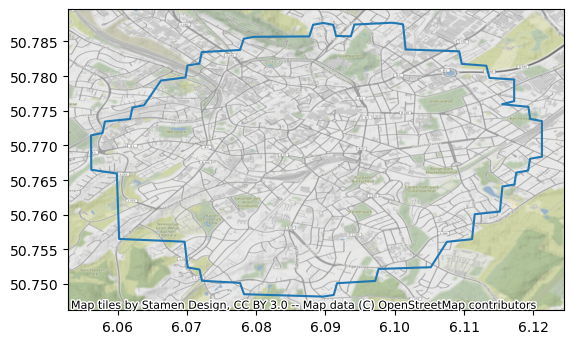

In [11]:
somedata = json.loads(input())
gdf = gpd.GeoDataFrame.from_features(somedata, crs='EPSG:4326')
ax = gdf.plot()
ctx.add_basemap(ax, crs=gdf.crs)

In [18]:
polygons = []
for l1 in coords:
    for l2 in l1['coordinates']:
        polygons.append(Polygon([[e[1], e[0]] for e in l2]))
result = gpd.GeoSeries(MultiPolygon(polygons)).set_crs("EPSG:4326")

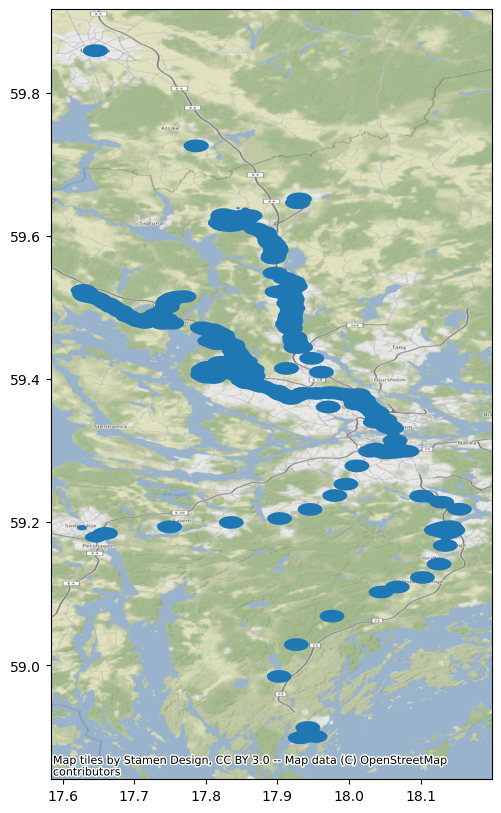

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
result.plot(ax=ax)
ctx.add_basemap(ax, crs=result.crs)